#SF Crime Prediction

In [1]:
import numpy as np
import pandas as pd

In [47]:
# turn csv into DataFrame
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
print(f'df_train has {len(df_train.columns)} columns')
print(f'df_train has {len(df_train)} entries.')
print(df_train.columns)

print(f'df_test has {len(df_test.columns)} columns')
print(f'df_test has {len(df_train)} entries.')
print(df_test.columns)

df_train.head()
df_test.head()

df_train has 9 columns
df_train has 468458 entries.
Index(['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y'],
      dtype='object')
df_test has 7 columns
df_test has 468458 entries.
Index(['Id', 'Dates', 'DayOfWeek', 'PdDistrict', 'Address', 'X', 'Y'], dtype='object')


Id                Dates DayOfWeek PdDistrict                   Address  \
0   0  2015-05-10 23:59:00    Sunday    BAYVIEW   2000 Block of THOMAS AV   
1   1  2015-05-10 23:51:00    Sunday    BAYVIEW        3RD ST / REVERE AV   
2   2  2015-05-10 23:50:00    Sunday   NORTHERN    2000 Block of GOUGH ST   
3   3  2015-05-10 23:45:00    Sunday  INGLESIDE  4700 Block of MISSION ST   
4   4  2015-05-10 23:45:00    Sunday  INGLESIDE  4700 Block of MISSION ST   

            X          Y  
0 -122.399588  37.735051  
1 -122.391523  37.732432  
2 -122.426002  37.792212  
3 -122.437394  37.721412  
4 -122.437394  37.721412

In [22]:
diff_columns = df_train.columns.symmetric_difference(df_test.columns)
print(f'they have following different columns: {diff_columns}')

they have following different columns: Index(['Category', 'Descript', 'Id', 'Resolution'], dtype='object')


## Process the dataset

### Encode categorical data into numerical data.

In [5]:
df_eda = df_train.copy()
df_eda.head()

Dates        Category                      Descript  \
0  2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1  2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2  2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

            X          Y  
0 -122.425892  37.774599  
1 -122.425892  37.774599  
2 -122.424363  37.800414  
3 -122.426995  37.800873  
4 -122.438738  37.771541

In [6]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.2 MB/s eta 0:00:00


In [7]:
import pandas as pd
import category_encoders as ce

def target_encode_proportion(df, column_name):

    # Create a copy of the input DataFrame
    df_encoded = df.copy()

    # Initialize the CountEncoder
    count_encoder = ce.CountEncoder()

    # Encode the specified column
    new_column_name = f"{column_name}_encoded"
    df_encoded[new_column_name] = count_encoder.fit_transform(df_encoded[column_name])

    return df_encoded

In [8]:
df_eda = target_encode_proportion(df_eda, 'Category')
df_eda = target_encode_proportion(df_eda, 'PdDistrict')
df_eda = target_encode_proportion(df_eda, 'Resolution')

In [9]:
df_eda.head()

Dates        Category                      Descript  \
0  2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1  2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2  2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

            X          Y  Category_encoded  PdDistrict_encoded  \
0 -122.425892  37.774599             21255               54050   
1 -122.425892  37.774599             68366               54050   
2 -122.424363  37.800414             68366               54050   
3 -122.426995  37.800873            100997               54050   
4 -122.438738  37.771541            100997               26965   

   Resolution_encoded  
0              108949  
1              108949  
2              108949  
3              280919  
4              280919

## Encode Monday-Sunday to 1-7

In [10]:
def encode_day_of_week(df, column_name):
    day_map = {
        'Monday': 1,
        'Tuesday': 2,
        'Wednesday': 3,
        'Thursday': 4,
        'Friday': 5,
        'Saturday': 6,
        'Sunday': 7
    }

    new_column_name = f"{column_name}_encoded"
    df[new_column_name] = df[column_name].map(day_map)

    return df

In [11]:
df_eda = encode_day_of_week(df_eda, 'DayOfWeek')

df_eda.head()

Dates        Category                      Descript  \
0  2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1  2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2  2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

            X          Y  Category_encoded  PdDistrict_encoded  \
0 -122.425892  37.774599             21255               54050   
1 -122.425892  37.774599             68366               54050   
2 -122.424363  37.800414             68366               54050   
3 -122.426995  37.800873            100997               54050   
4 -122.438738  37.771541            100997               26965   

   Resolution_encoded  DayOfWeek_encoded  
0              108949                  3  
1              108949                  3  
2              108949                  3  
3              280919                  3  
4              280919                  3

## Crime happens more likely on weekdays or weekends?
-- Weekdays have averagely more crime than weekends

In [12]:
weekday_crimes = df_eda[df_eda['DayOfWeek_encoded'].isin(range(1, 6))]['Dates'].count()
weekend_crimes = df_eda[df_eda['DayOfWeek_encoded'].isin([6, 7])]['Dates'].count()

weekday_count = df_eda[df_eda['DayOfWeek_encoded'].isin(range(1, 6))]['DayOfWeek_encoded'].nunique()
weekend_count = df_eda[df_eda['DayOfWeek_encoded'].isin([6, 7])]['DayOfWeek_encoded'].nunique()

weekday_crime_per_day = weekday_crimes / weekday_count
weekend_crime_per_day = weekend_crimes / weekend_count

print(f"Average weekday crimes per day: {weekday_crime_per_day:.2f}")
print(f"Average weekend crimes per day: {weekend_crime_per_day:.2f}")

Average weekday crimes per day: 67122.80
Average weekend crimes per day: 66422.00


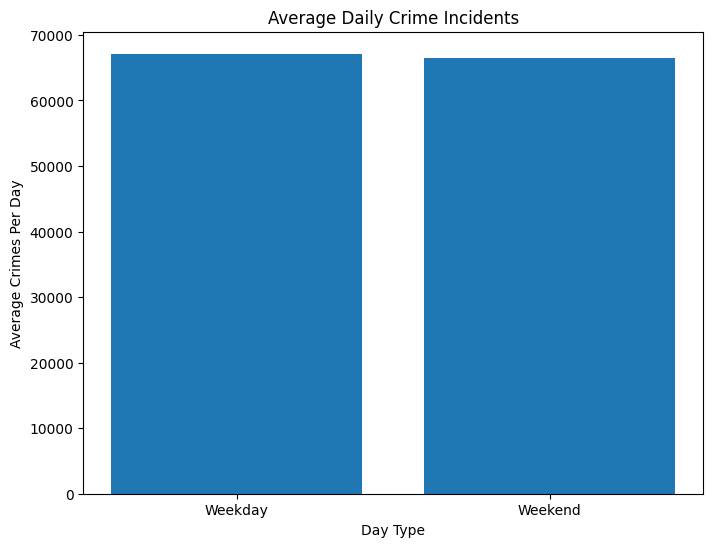

In [13]:
import matplotlib.pyplot as plt

weekday_crimes = df_eda[df_eda['DayOfWeek_encoded'].isin(range(1, 6))]['Dates'].count()
weekday_count = df_eda[df_eda['DayOfWeek_encoded'].isin(range(1, 6))]['DayOfWeek_encoded'].nunique()
weekday_crime_per_day = weekday_crimes / weekday_count

weekend_crimes = df_eda[df_eda['DayOfWeek_encoded'].isin([6, 7])]['Dates'].count()
weekend_count = df_eda[df_eda['DayOfWeek_encoded'].isin([6, 7])]['DayOfWeek_encoded'].nunique()
weekend_crime_per_day = weekend_crimes / weekend_count

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(['Weekday', 'Weekend'], [weekday_crime_per_day, weekend_crime_per_day])
ax.set_title('Average Daily Crime Incidents')
ax.set_xlabel('Day Type')
ax.set_ylabel('Average Crimes Per Day')
plt.show()

In [14]:
crime_counts_by_day = df_eda.groupby('DayOfWeek_encoded')['Dates'].count()
crime_counts_by_day

DayOfWeek_encoded
1    64355
2    65630
3    68742
4    65601
5    71286
6    69097
7    63747
Name: Dates, dtype: int64

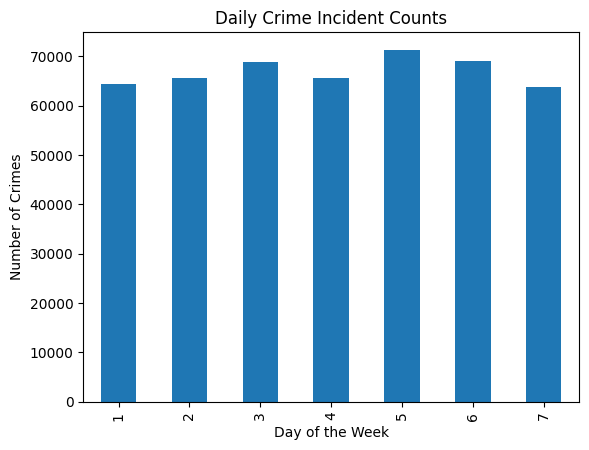

In [15]:
import matplotlib.pyplot as plt

crime_counts_by_day.plot(kind='bar')
plt.title('Daily Crime Incident Counts')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')
plt.show()

In [16]:
crime_by_category_weekday = df_eda.groupby(['Category', 'DayOfWeek_encoded']).size().unstack()
crime_by_category_weekday_pct = crime_by_category_weekday.apply(lambda x: x / x.sum(), axis=1)
crime_by_category_weekday_pct

DayOfWeek_encoded                   1         2         3         4         5  \
Category                                                                        
ARSON                        0.159588  0.148005  0.131274  0.136422  0.148005   
ASSAULT                      0.136029  0.131217  0.134630  0.129548  0.144695   
BAD CHECKS                   0.185714  0.150000  0.192857  0.164286  0.171429   
BRIBERY                      0.144444  0.122222  0.161111  0.122222  0.161111   
BURGLARY                     0.139148  0.148303  0.149374  0.144876  0.167791   
DISORDERLY CONDUCT           0.150134  0.159517  0.158624  0.123771  0.117069   
DRIVING UNDER THE INFLUENCE  0.117050  0.114344  0.094723  0.116373  0.155616   
DRUG/NARCOTIC                0.138327  0.153888  0.174795  0.157740  0.134593   
DRUNKENNESS                  0.116773  0.103609  0.124841  0.109554  0.149045   
EMBEZZLEMENT                 0.188324  0.150659  0.131827  0.133710  0.178908   
EXTORTION                    0.107143  0.150000  0.171429  0.157143  0.121429   
FAMILY OFFENSES              0.165254  0.152542  0.152542  0.131356  0.186441   
FORGERY/COUNTERFEITING       0.149449  0.160199  0.162821  0.149974  0.168065   
FRAUD                        0.144381  0.146827  0.153718  0.139602  0.158608   
GAMBLING                     0.123077  0.076923  0.200000  0.153846  0.200000   
KIDNAPPING                   0.143746  0.118176  0.138217  0.132688  0.156876   
LARCENY/THEFT                0.134014  0.135509  0.139044  0.137361  0.157421   
LIQUOR LAWS                  0.094235  0.123060  0.205100  0.143016  0.154102   
LOITERING                    0.199525  0.237530  0.147268  0.102138  0.052257   
MISSING PERSON               0.139578  0.139305  0.136230  0.139714  0.181321   
NON-CRIMINAL                 0.138132  0.137579  0.142789  0.138813  0.151091   
OTHER OFFENSES               0.141488  0.146491  0.157725  0.142512  0.147208   
PORNOGRAPHY/OBSCENE MAT      0.142857  0.285714  0.142857  0.285714       NaN   
PROSTITUTION                 0.062480  0.166293  0.163089  0.210509  0.140660   
RECOVERED VEHICLE            0.167335  0.169054  0.156447  0.138682  0.159885   
ROBBERY                      0.134589  0.137219  0.142152  0.137137  0.149552   
RUNAWAY                      0.166667  0.153763  0.138710  0.147312  0.158065   
SECONDARY CODES              0.147700  0.134948  0.133656  0.142534  0.138015   
SEX OFFENSES FORCIBLE        0.139507  0.121622  0.139905  0.132750  0.143482   
SEX OFFENSES NON FORCIBLE    0.112676  0.211268  0.140845  0.126761  0.140845   
STOLEN PROPERTY              0.138832  0.150172  0.156357  0.142268  0.146048   
SUICIDE                      0.153226  0.137097  0.116935  0.169355  0.141129   
SUSPICIOUS OCC               0.138608  0.144678  0.157479  0.142802  0.152182   
TREA                         0.166667  0.166667       NaN  0.166667  0.166667   
TRESPASS                     0.149166  0.162003  0.157638  0.132478  0.132221   
VANDALISM                    0.133997  0.132651  0.130857  0.131713  0.158994   
VEHICLE THEFT                0.135889  0.133319  0.134421  0.136781  0.163004   
WARRANTS                     0.138932  0.145001  0.170501  0.148106  0.141990   
WEAPON LAWS                  0.136459  0.128506  0.151319  0.154667  0.147133   

DayOfWeek_encoded                   6         7  
Category                                         
ARSON                        0.144144  0.132561  
ASSAULT                      0.160898  0.162984  
BAD CHECKS                   0.100000  0.035714  
BRIBERY                      0.144444  0.144444  
BURGLARY                     0.132455  0.118053  
DISORDERLY CONDUCT           0.148347  0.142538  
DRIVING UNDER THE INFLUENCE  0.209743  0.192152  
DRUG/NARCOTIC                0.122568  0.118089  
DRUNKENNESS                  0.195329  0.200849  
EMBEZZLEMENT                 0.129944  0.086629  
EXTORTION                    0.135714  0.157143  
FAMILY OFFENSES             

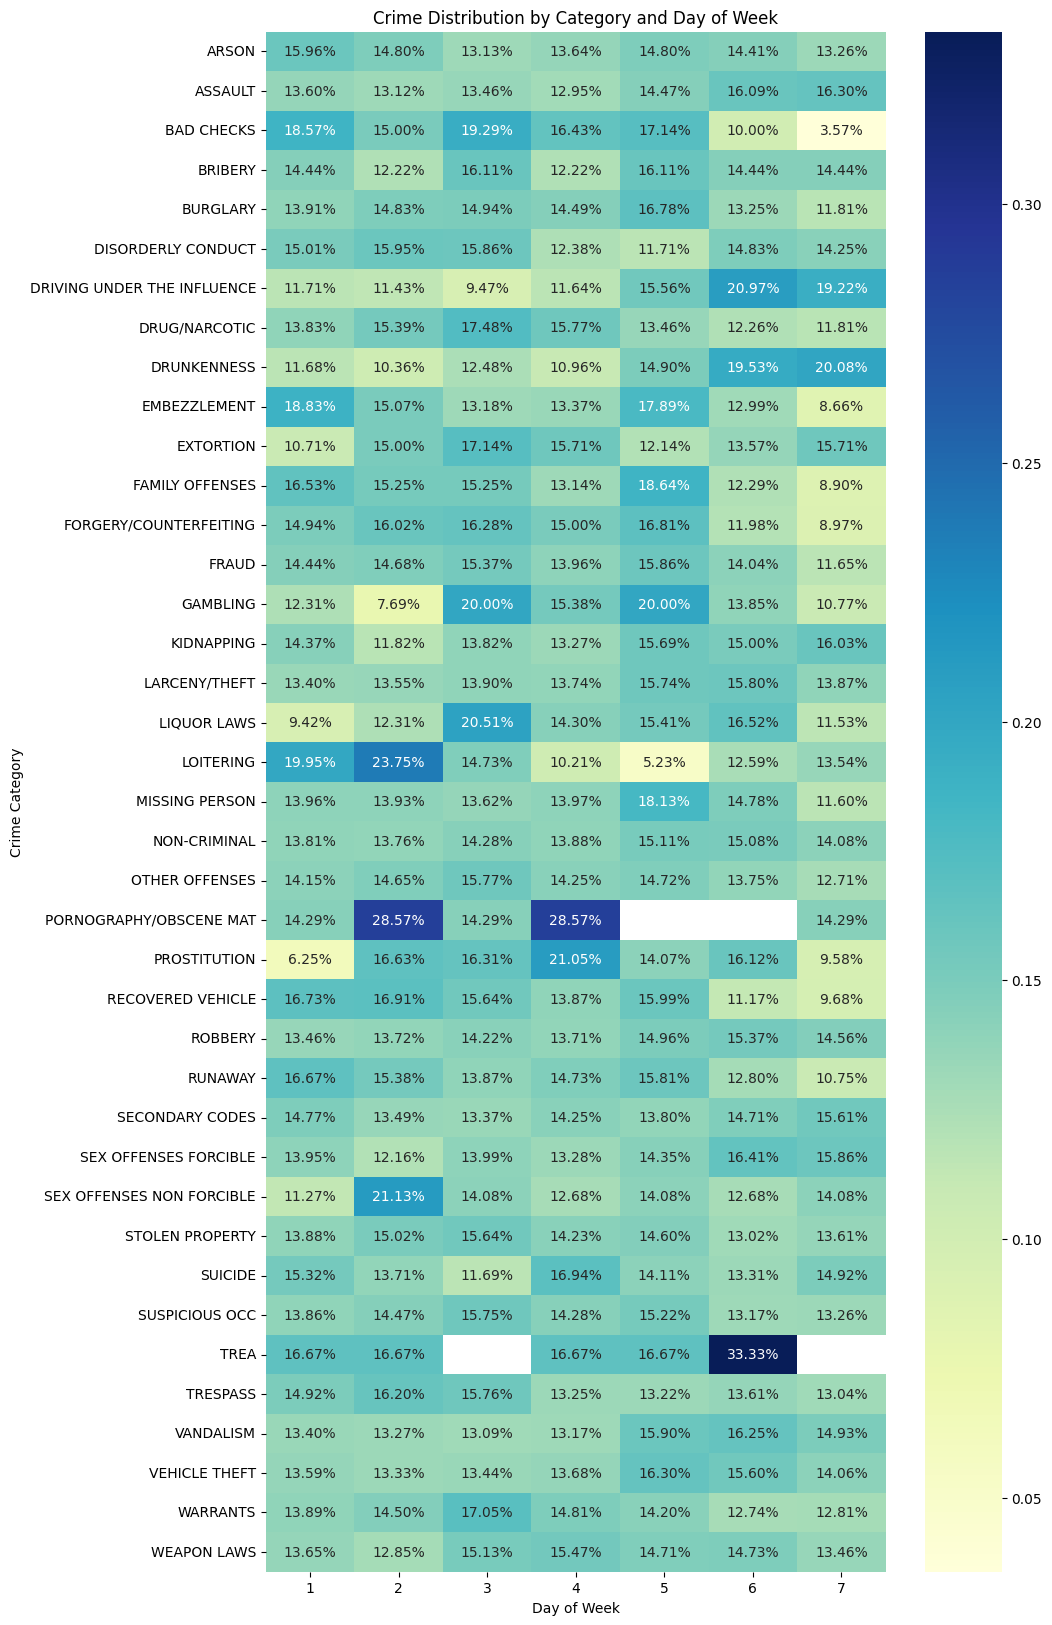

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 20))
sns.heatmap(crime_by_category_weekday_pct, cmap='YlGnBu', annot=True, fmt='.2%')
plt.xlabel('Day of Week')
plt.ylabel('Crime Category')
plt.title('Crime Distribution by Category and Day of Week')
plt.show()

# K-Means Clustering

In [48]:
df_train.dtypes

Dates          object
Category       object
Descript       object
DayOfWeek      object
PdDistrict     object
Resolution     object
Address        object
X             float64
Y             float64
dtype: object

In [49]:
df_train = df_train.drop(['PdDistrict', 'Address', 'Resolution', 'Descript', 'DayOfWeek'], axis = 1)

In [50]:
df_train.head()

Dates        Category           X          Y
0  2015-05-13 23:53:00        WARRANTS -122.425892  37.774599
1  2015-05-13 23:53:00  OTHER OFFENSES -122.425892  37.774599
2  2015-05-13 23:33:00  OTHER OFFENSES -122.424363  37.800414
3  2015-05-13 23:30:00   LARCENY/THEFT -122.426995  37.800873
4  2015-05-13 23:30:00   LARCENY/THEFT -122.438738  37.771541

In [51]:
df_train.tail(5)

Dates        Category           X          Y
468453  2008-10-04 21:16:00  OTHER OFFENSES -122.414234  37.754099
468454  2008-10-04 21:15:00         ASSAULT -122.403405  37.775421
468455  2008-10-04 21:15:00  OTHER OFFENSES -122.436275  37.800813
468456  2008-10-04 21:15:00   VEHICLE THEFT -122.477245  37.772943
468457  2008-10-04 21:00:00   VEHICLE THEFT -122.412350  37.774400

In [52]:
df_train.isnull().sum()

Dates       0
Category    0
X           0
Y           0
dtype: int64

In [53]:
f = lambda x: (x["Dates"].split())[0]
df_train["Dates"] = df_train.apply(f, axis=1)
df_train.head()

Dates        Category           X          Y
0  2015-05-13        WARRANTS -122.425892  37.774599
1  2015-05-13  OTHER OFFENSES -122.425892  37.774599
2  2015-05-13  OTHER OFFENSES -122.424363  37.800414
3  2015-05-13   LARCENY/THEFT -122.426995  37.800873
4  2015-05-13   LARCENY/THEFT -122.438738  37.771541

In [54]:
f = lambda x: (x["Dates"].split('-'))[0]
df_train["Dates"] = df_train.apply(f, axis=1)
df_train.head()

Dates        Category           X          Y
0  2015        WARRANTS -122.425892  37.774599
1  2015  OTHER OFFENSES -122.425892  37.774599
2  2015  OTHER OFFENSES -122.424363  37.800414
3  2015   LARCENY/THEFT -122.426995  37.800873
4  2015   LARCENY/THEFT -122.438738  37.771541

In [55]:
df_train.tail()

Dates        Category           X          Y
468453  2008  OTHER OFFENSES -122.414234  37.754099
468454  2008         ASSAULT -122.403405  37.775421
468455  2008  OTHER OFFENSES -122.436275  37.800813
468456  2008   VEHICLE THEFT -122.477245  37.772943
468457  2008   VEHICLE THEFT -122.412350  37.774400

In [56]:
df_2014 =  df_train[(df_train.Dates == '2014')]
df_2014.head()

Dates       Category           X          Y
27584  2014  LARCENY/THEFT -122.435563  37.760801
27585  2014  LARCENY/THEFT -122.433575  37.800037
27586  2014  VEHICLE THEFT -122.412777  37.786834
27587  2014        ASSAULT -122.421702  37.773641
27588  2014        ASSAULT -122.421702  37.773641

In [57]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_2014[['X']])
df_2014['X_scaled'] = scaler.transform(df_2014[['X']])
scaler.fit(df_2014[['Y']])
df_2014['Y_scaled'] = scaler.transform(df_2014[['Y']])

<ipython-input-57-163af88d8a45>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2014['X_scaled'] = scaler.transform(df_2014[['X']])
<ipython-input-57-163af88d8a45>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2014['Y_scaled'] = scaler.transform(df_2014[['Y']])


In [58]:
df_2014.head()

Dates       Category           X          Y  X_scaled  Y_scaled
27584  2014  LARCENY/THEFT -122.435563  37.760801  0.526134  0.471397
27585  2014  LARCENY/THEFT -122.433575  37.800037  0.539528  0.821894
27586  2014  VEHICLE THEFT -122.412777  37.786834  0.679676  0.703952
27587  2014        ASSAULT -122.421702  37.773641  0.619540  0.586098
27588  2014        ASSAULT -122.421702  37.773641  0.619540  0.586098

In [60]:
from sklearn.cluster import KMeans
k_range = range(1,15)
list_dist = []
for k in k_range:
    model = KMeans(n_clusters=k, n_init=10, random_state=42)
    model.fit(df_2014[['X_scaled','Y_scaled']])
    list_dist.append(model.inertia_)

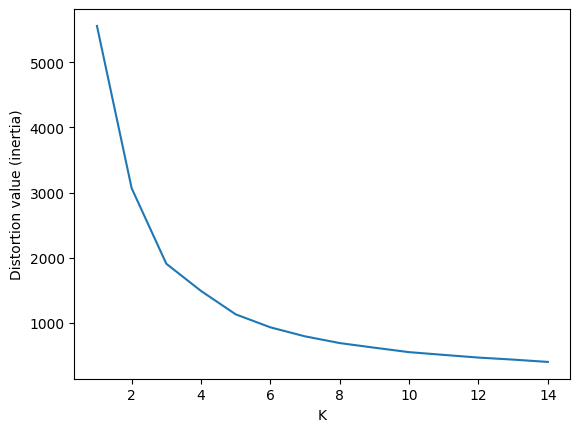

In [61]:
from matplotlib import pyplot as plt

plt.xlabel('K')
plt.ylabel('Distortion value (inertia)')
plt.plot(k_range,list_dist)
plt.show()

In [62]:
model = KMeans(n_clusters=5)

In [63]:
y_predicted = model.fit_predict(df_2014[['X_scaled','Y_scaled']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([4, 0, 0, ..., 0, 3, 0], dtype=int32)

In [64]:
df_2014['cluster'] = y_predicted
df_2014

<ipython-input-64-e054145cfda4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2014['cluster'] = y_predicted


Dates        Category           X          Y  X_scaled  Y_scaled  \
27584   2014   LARCENY/THEFT -122.435563  37.760801  0.526134  0.471397   
27585   2014   LARCENY/THEFT -122.433575  37.800037  0.539528  0.821894   
27586   2014   VEHICLE THEFT -122.412777  37.786834  0.679676  0.703952   
27587   2014         ASSAULT -122.421702  37.773641  0.619540  0.586098   
27588   2014         ASSAULT -122.421702  37.773641  0.619540  0.586098   
...      ...             ...         ...        ...       ...       ...   
102345  2014  OTHER OFFENSES -122.387235  37.719401  0.851793  0.101571   
102346  2014        WARRANTS -122.387235  37.719401  0.851793  0.101571   
102347  2014           FRAUD -122.418382  37.783258  0.641908  0.672007   
102348  2014    NON-CRIMINAL -122.413652  37.728320  0.673778  0.181249   
102349  2014           FRAUD -122.408563  37.797007  0.708076  0.794822   

        cluster  
27584         4  
27585         0  
27586         0  
27587         4  
27588         4  
...         ...  
102345        3  
102346        3  
102347        0  
102348        3  
102349        0  

[74766 rows x 7 columns]

from matplotlib import pyplot as plt
df_2014['X'].plot(kind='hist', bins=20, title='X')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_2014['Y'].plot(kind='hist', bins=20, title='Y')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_2014['X_scaled'].plot(kind='hist', bins=20, title='X_scaled')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_2014['Y_scaled'].plot(kind='hist', bins=20, title='Y_scaled')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_2014.plot(kind='scatter', x='X', y='Y', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_2014.plot(kind='scatter', x='Y', y='X_scaled', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_2014.plot(kind='scatter', x='X_scaled', y='Y_scaled', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_2014.plot(kind='scatter', x='Y_scaled', y='cluster', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Dates']
  ys = series['X']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_2014.sort_values('Dates', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Dates')
_ = plt.ylabel('X')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Dates']
  ys = series['Y']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_2014.sort_values('Dates', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Dates')
_ = plt.ylabel('Y')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Dates']
  ys = series['X_scaled']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_2014.sort_values('Dates', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Dates')
_ = plt.ylabel('X_scaled')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Dates']
  ys = series['Y_scaled']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_2014.sort_values('Dates', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Dates')
_ = plt.ylabel('Y_scaled')

from matplotlib import pyplot as plt
df_2014['X'].plot(kind='line', figsize=(8, 4), title='X')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_2014['Y'].plot(kind='line', figsize=(8, 4), title='Y')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_2014['X_scaled'].plot(kind='line', figsize=(8, 4), title='X_scaled')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_2014['Y_scaled'].plot(kind='line', figsize=(8, 4), title='Y_scaled')
plt.gca().spines[['top', 'right']].set_visible(False)

In [65]:
import plotly.express as px
figure = px.scatter_mapbox(df_2014, lat='Y', lon='X',
                       center = dict(lat = 37.8, lon = -122.4), zoom = 9, opacity = .9, mapbox_style = 'stamen-terrain', color = 'cluster', title = 'San Francisco Crime Districts', width = 1100, height = 700, hover_data = ['cluster', 'Category', 'Y', 'X']
                       )
figure.show()

In [68]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(df_2014[['X_scaled', 'Y_scaled']], y_predicted)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.42657348350986973


## Finding the Optimal number of clusters using the Silhouette score

In [69]:
k_range = range(2, 10)
silhouette_scores = []

In [70]:
for k in k_range:
    model = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = model.fit_predict(df_2014[['X_scaled', 'Y_scaled']])
    silhouette_avg = silhouette_score(df_2014[['X_scaled', 'Y_scaled']], labels)
    silhouette_scores.append(silhouette_avg)

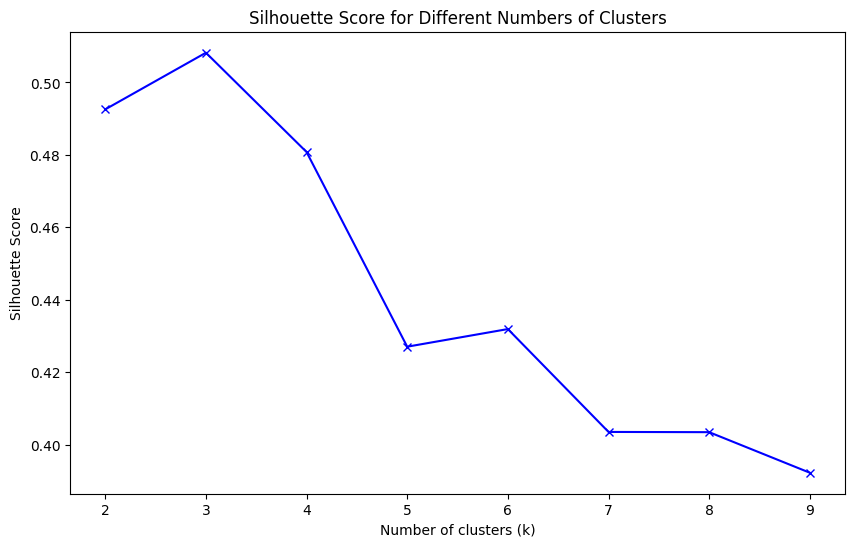

In [71]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.show()

In [72]:
optimal_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters (k): {optimal_k}")

Optimal number of clusters (k): 3


In [73]:
model = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
labels = model.fit_predict(df_2014[['X_scaled', 'Y_scaled']])

In [74]:
silhouette_avg = silhouette_score(df_2014[['X_scaled', 'Y_scaled']], labels)
print(f"Silhouette Score for optimal k: {silhouette_avg}")

Silhouette Score for optimal k: 0.5082089205558781


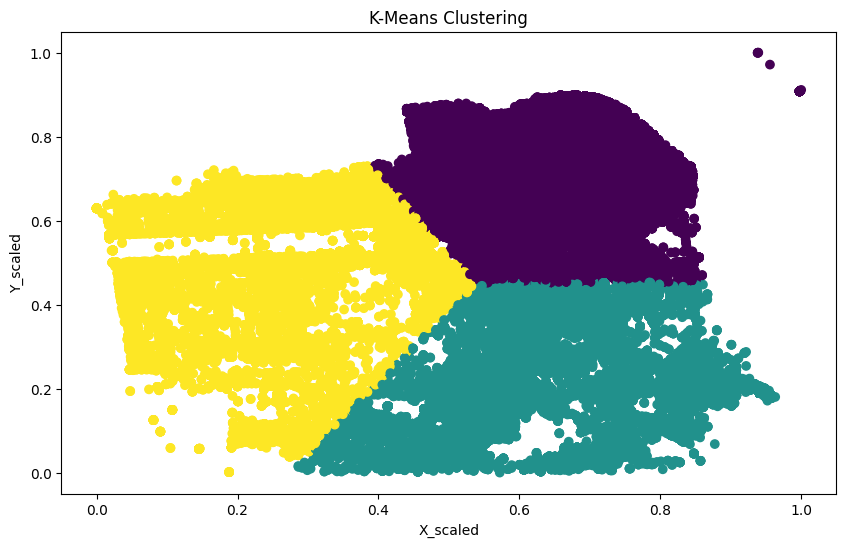

In [75]:
plt.figure(figsize=(10, 6))
plt.scatter(df_2014['X_scaled'], df_2014['Y_scaled'], c=labels, cmap='viridis')
plt.xlabel('X_scaled')
plt.ylabel('Y_scaled')
plt.title('K-Means Clustering')
plt.show()